In [1]:
import numpy as np

embeddding = np.load("/share/sda/mohammadqazi/project/CTscan_prognosis_VLM-main/docs/embeddings/seg.npy", allow_pickle=True)

In [2]:
import numpy as np
img_data = np.load("/share/sda/mohammadqazi/project/hector/pre_processed/CHUM-006_pt_roi.npz")['arr_0']
img_data.shape

(240, 480, 480)

In [14]:
embeddding.item().keys()

dict_keys(['CHUM-001_ct_roi.npz', 'CHUM-002_ct_roi.npz', 'CHUM-006_ct_roi.npz', 'CHUM-007_ct_roi.npz', 'CHUM-008_ct_roi.npz', 'CHUM-010_ct_roi.npz', 'CHUM-011_ct_roi.npz', 'CHUM-012_ct_roi.npz', 'CHUM-013_ct_roi.npz', 'CHUM-014_ct_roi.npz', 'CHUM-015_ct_roi.npz', 'CHUM-016_ct_roi.npz', 'CHUM-017_ct_roi.npz', 'CHUM-018_ct_roi.npz', 'CHUM-019_ct_roi.npz', 'CHUM-021_ct_roi.npz', 'CHUM-022_ct_roi.npz', 'CHUM-023_ct_roi.npz', 'CHUM-024_ct_roi.npz', 'CHUM-026_ct_roi.npz', 'CHUM-027_ct_roi.npz', 'CHUM-029_ct_roi.npz', 'CHUM-030_ct_roi.npz', 'CHUM-032_ct_roi.npz', 'CHUM-033_ct_roi.npz', 'CHUM-034_ct_roi.npz', 'CHUM-035_ct_roi.npz', 'CHUM-036_ct_roi.npz', 'CHUM-037_ct_roi.npz', 'CHUM-038_ct_roi.npz', 'CHUM-039_ct_roi.npz', 'CHUM-040_ct_roi.npz', 'CHUM-041_ct_roi.npz', 'CHUM-042_ct_roi.npz', 'CHUM-043_ct_roi.npz', 'CHUM-044_ct_roi.npz', 'CHUM-045_ct_roi.npz', 'CHUM-046_ct_roi.npz', 'CHUM-047_ct_roi.npz', 'CHUM-048_ct_roi.npz', 'CHUM-049_ct_roi.npz', 'CHUM-050_ct_roi.npz', 'CHUM-051_ct_roi.npz', 

In [19]:
embeddding.item()['CHUM-001_ct_roi.npz']['hidden_state'].shape

(4, 512, 24, 24, 24)

In [53]:
import nibabel as nib

img = nib.load("/share/sda/mohammadqazi/project/hector/dataset/processed_samples_all/CHUM-001_ct_roi.nii.gz")

In [62]:
img.get_fdata().shape, img.get_fdata().max(), img.get_fdata().min()

((480, 480, 240),
 np.float64(2002.172607421875),
 np.float64(-3512.314208984375))

In [52]:
import torch
import torch.nn.functional as F


ct_scan = np.load("/share/sda/mohammadqazi/project/hector/pre_processed/CHUM-001_ct_roi.npz")['arr_0']
print(ct_scan.shape)
tensor = torch.tensor(ct_scan)
tensor = tensor.unsqueeze(0)
ct_tensor = F.interpolate(tensor.unsqueeze(0), size=(96,96,96), mode='nearest')
ct_tensor = ct_tensor.squeeze(0)

(240, 480, 480)


In [50]:
ct_scan = ct_tensor.squeeze(0)  

In [51]:
ct_scan.min(), ct_scan.max()

(tensor(-1.), tensor(1.))

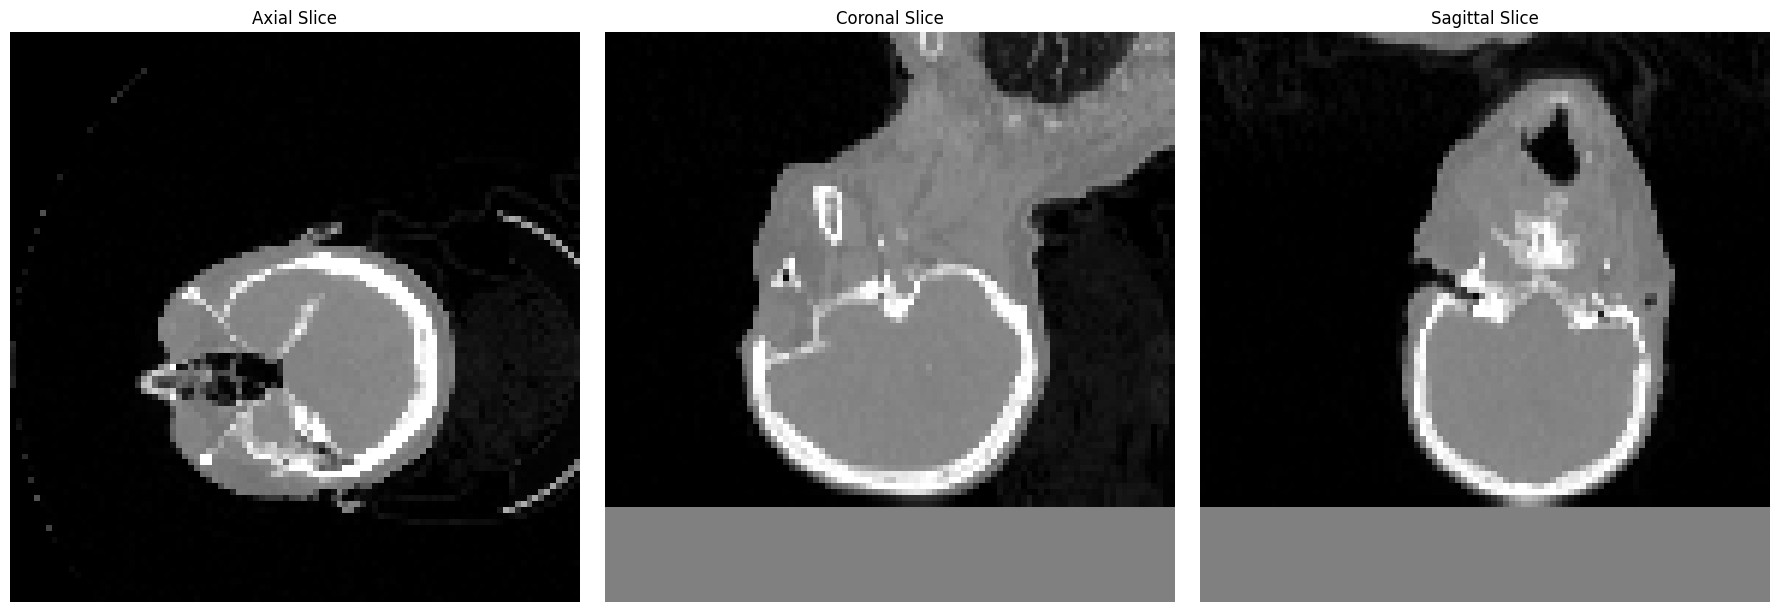

In [37]:
import numpy as np
import matplotlib.pyplot as plt

ct_scan = ct_tensor.squeeze(0)  

# Assume 'ct_scan' is your 3D CT volume with shape (240, 480, 480)
# For example, you could load it from a NIfTI file using nibabel:
# import nibabel as nib
# ct_scan = nib.load('path_to_ct_scan.nii.gz').get_fdata()

# Calculate mid-slices for each axis
mid_slice_axial   = ct_scan[ct_scan.shape[0] // 2, :, :]   # axial view (slice along first dimension)
mid_slice_coronal = ct_scan[:, ct_scan.shape[1] // 2, :]   # coronal view (slice along second dimension)
mid_slice_sagittal= ct_scan[:, :, ct_scan.shape[2] // 2]   # sagittal view (slice along third dimension)

# Plot each slice using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Axial view
axes[0].imshow(mid_slice_axial, cmap='gray')
axes[0].set_title('Axial Slice')
axes[0].axis('off')

# Coronal view
axes[1].imshow(mid_slice_coronal, cmap='gray')
axes[1].set_title('Coronal Slice')
axes[1].axis('off')

# Sagittal view
axes[2].imshow(mid_slice_sagittal, cmap='gray')
axes[2].set_title('Sagittal Slice')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [42]:
import nibabel as nib

def read_data(path_to_nifti, return_numpy=True):
    if return_numpy:
        img_data = nib.load(str(path_to_nifti)).get_fdata()
        img_data = np.expand_dims(img_data, axis=0)  # Adds channel dimension
        img_data = np.transpose(img_data, (0, 3, 1, 2))  # Reorder to (C, D, H, W)
        tensor = torch.tensor(img_data)
        # tensor = nnf.interpolate(tensor, size=torch.randn(96, 96, 96).shape, mode='trilinear', align_corners=True)
        return tensor
    return nib.load(str(path_to_nifti))

mask_tensor =  read_data("/share/sda/mohammadqazi/project/hector/dataset/processed_samples_all/CHUM-001_mask_roi.nii.gz")

mask_tensor = mask_tensor.float()
mask_tensor = mask_tensor.unsqueeze(0)
mask_tensor = F.interpolate(mask_tensor, size=(96,96,96), mode='nearest')
mask_tensor = mask_tensor.squeeze(0)
mask_tensor = mask_tensor.long()


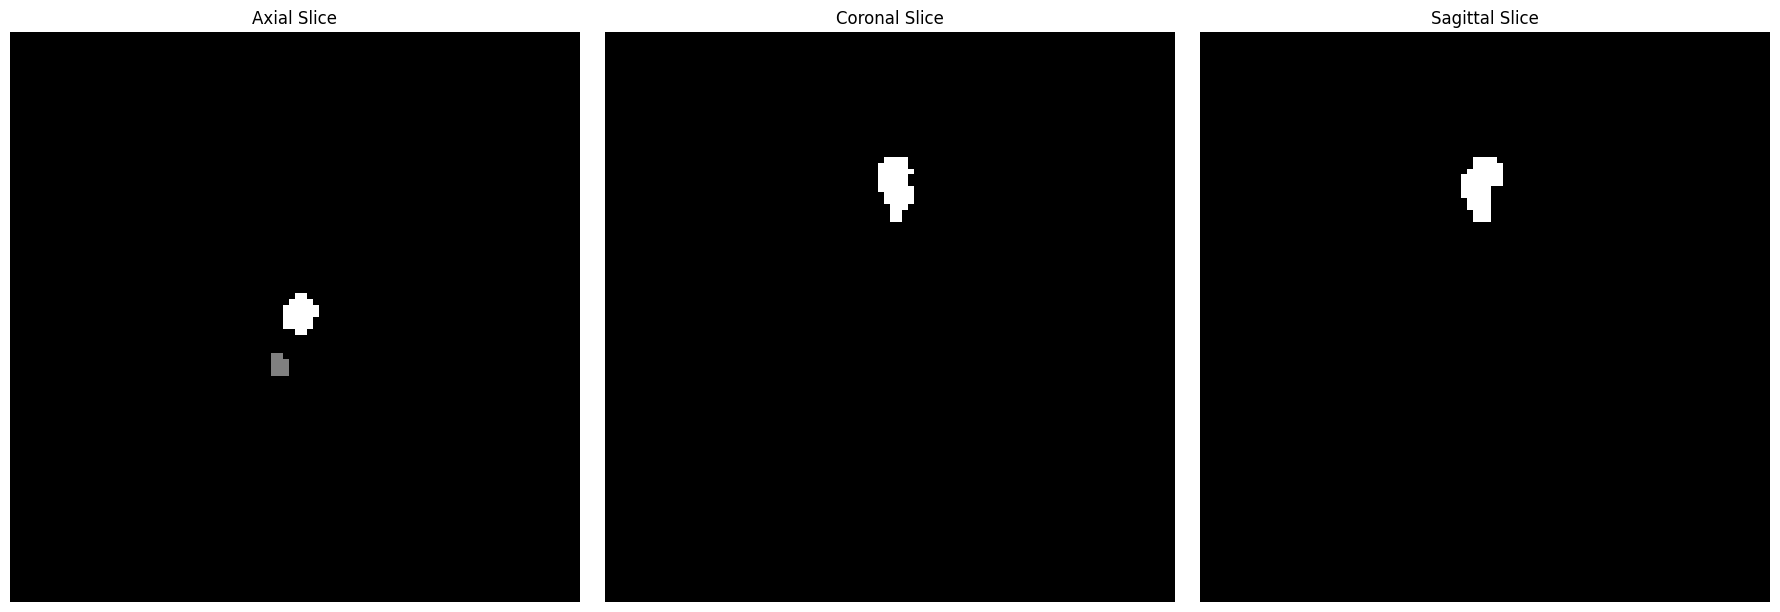

In [46]:
import numpy as np
import matplotlib.pyplot as plt

ct_scan = mask_tensor.squeeze(0)

# Assume 'ct_scan' is your 3D CT volume with shape (240, 480, 480)
# For example, you could load it from a NIfTI file using nibabel:
# import nibabel as nib
# ct_scan = nib.load('path_to_ct_scan.nii.gz').get_fdata()

# Calculate mid-slices for each axis
mid_slice_axial   = ct_scan[ct_scan.shape[0] // 4, :, :]   # axial view (slice along first dimension)
mid_slice_coronal = ct_scan[:, ct_scan.shape[1] // 2, :]   # coronal view (slice along second dimension)
mid_slice_sagittal= ct_scan[:, :, ct_scan.shape[2] // 2]   # sagittal view (slice along third dimension)

# Plot each slice using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Axial view
axes[0].imshow(mid_slice_axial, cmap='gray')
axes[0].set_title('Axial Slice')
axes[0].axis('off')

# Coronal view
axes[1].imshow(mid_slice_coronal, cmap='gray')
axes[1].set_title('Coronal Slice')
axes[1].axis('off')

# Sagittal view
axes[2].imshow(mid_slice_sagittal, cmap='gray')
axes[2].set_title('Sagittal Slice')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [36]:
from monai_dataset import get_loader_segmentation

train_loader, test_loader = get_loader_segmentation(ct_path = '/share/sda/mohammadqazi/project/hector/dataset/processed_samples_all',
        csv_file ="/share/sda/mohammadqazi/project/CTscan_prognosis_VLM-main/docs/TNM_hector_prompts.csv",
        seg_folder = '/share/sda/mohammadqazi/project/hector/dataset/processed_samples_all',
        emd_path = "/share/sda/mohammadqazi/project/CTscan_prognosis_VLM-main/docs/embeddings/seg_monai.npy",
        fold = 0)

409it [00:00, 24357.79it/s]


In [37]:
sample_batch = next(iter(train_loader))

In [38]:
sample_batch['ct'][0].shape

torch.Size([1, 96, 96, 96])

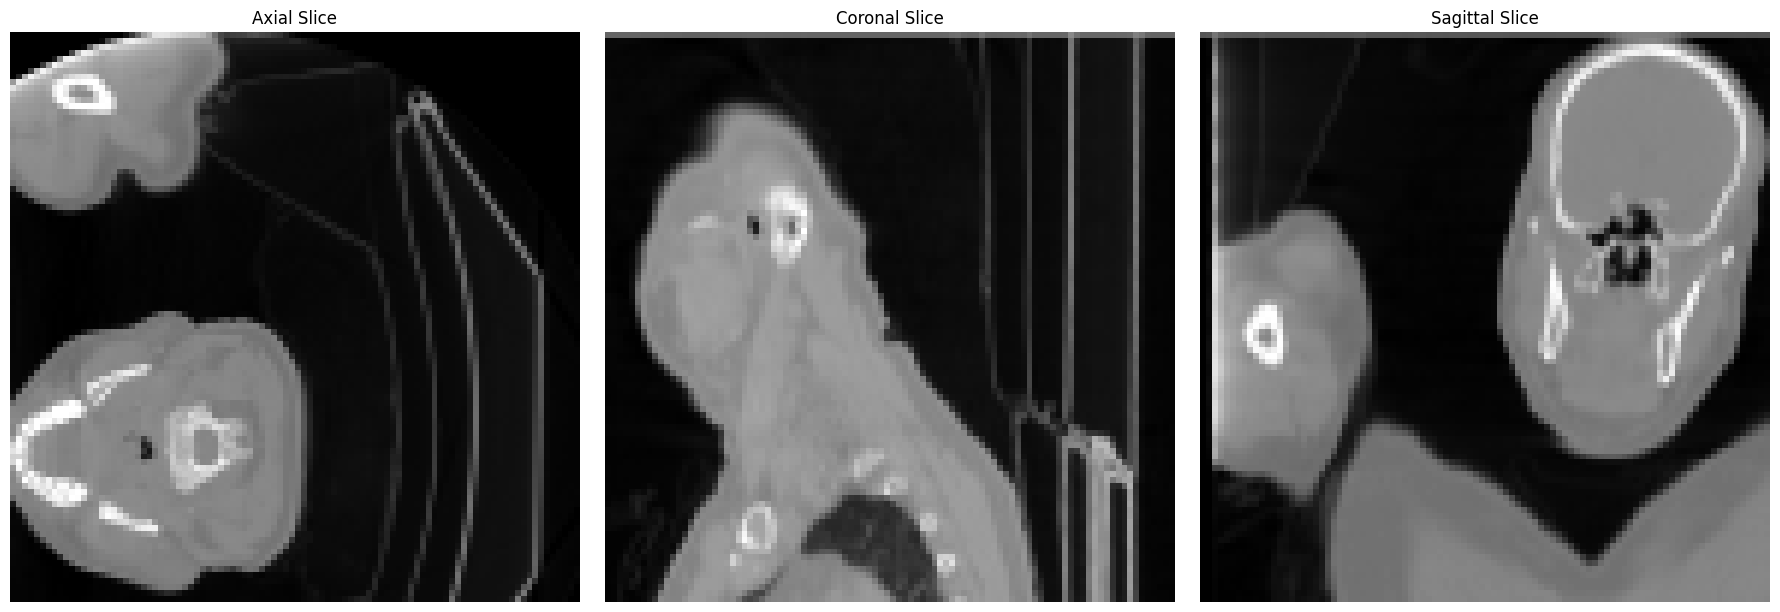

In [39]:
import numpy as np
import matplotlib.pyplot as plt

ct_scan = sample_batch['ct'][1].squeeze(0)  

# Assume 'ct_scan' is your 3D CT volume with shape (240, 480, 480)
# For example, you could load it from a NIfTI file using nibabel:
# import nibabel as nib
# ct_scan = nib.load('path_to_ct_scan.nii.gz').get_fdata()

# Calculate mid-slices for each axis
mid_slice_axial   = ct_scan[ct_scan.shape[0] // 2, :, :]   # axial view (slice along first dimension)
mid_slice_coronal = ct_scan[:, 55, :]   # coronal view (slice along second dimension)
mid_slice_sagittal= ct_scan[:, :, 15]   # sagittal view (slice along third dimension)

# Plot each slice using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Axial view
axes[0].imshow(mid_slice_axial, cmap='gray')
axes[0].set_title('Axial Slice')
axes[0].axis('off')

# Coronal view
axes[1].imshow(mid_slice_coronal, cmap='gray')
axes[1].set_title('Coronal Slice')
axes[1].axis('off')

# Sagittal view
axes[2].imshow(mid_slice_sagittal, cmap='gray')
axes[2].set_title('Sagittal Slice')
axes[2].axis('off')

plt.tight_layout()
plt.show()


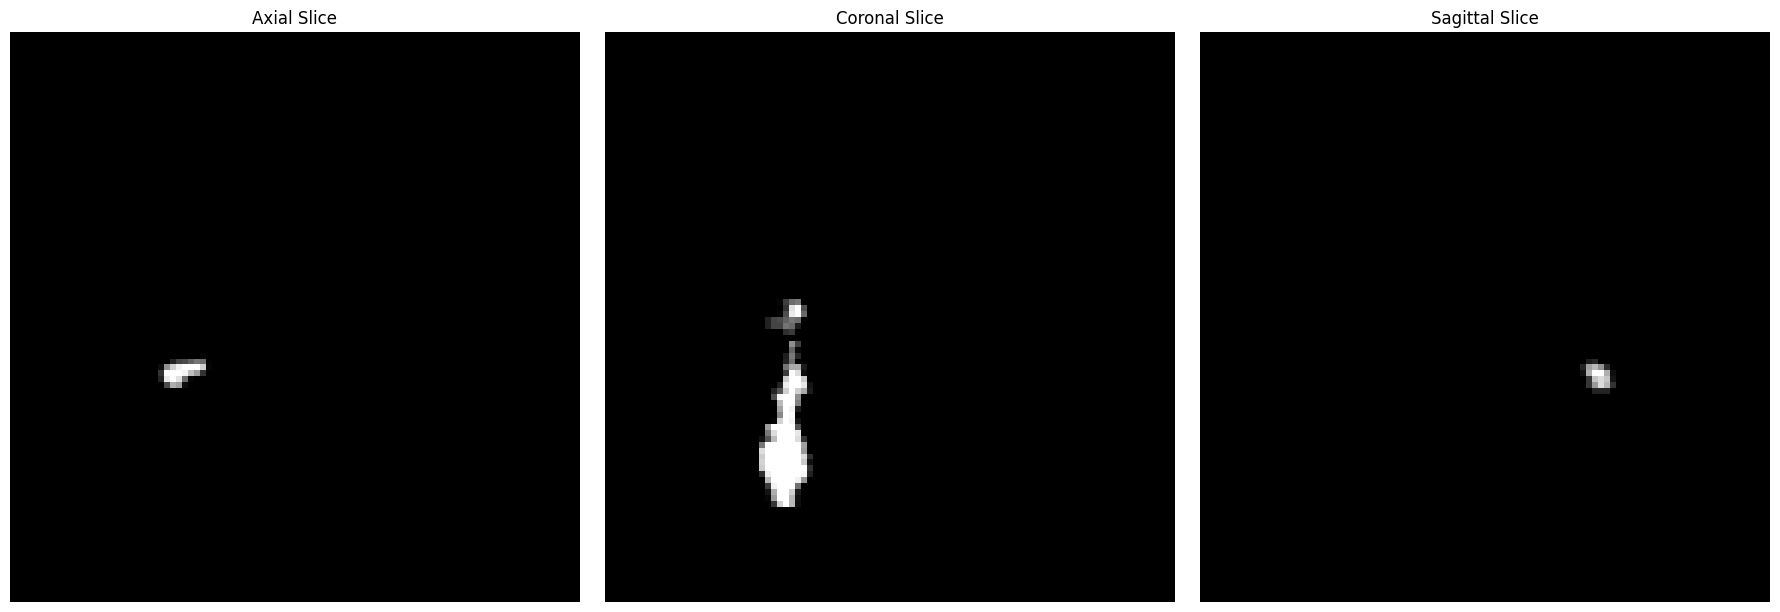

In [40]:
import numpy as np
import matplotlib.pyplot as plt

ct_scan = sample_batch['seg'][1].squeeze(0)  

# Assume 'ct_scan' is your 3D CT volume with shape (240, 480, 480)
# For example, you could load it from a NIfTI file using nibabel:
# import nibabel as nib
# ct_scan = nib.load('path_to_ct_scan.nii.gz').get_fdata()

# Calculate mid-slices for each axis
mid_slice_axial   = ct_scan[ct_scan.shape[0] // 2, :, :]   # axial view (slice along first dimension)
mid_slice_coronal = ct_scan[:, 55, :]   # coronal view (slice along second dimension)
mid_slice_sagittal= ct_scan[:, :, 15]   # sagittal view (slice along third dimension)

# Plot each slice using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Axial view
axes[0].imshow(mid_slice_axial, cmap='gray')
axes[0].set_title('Axial Slice')
axes[0].axis('off')

# Coronal view
axes[1].imshow(mid_slice_coronal, cmap='gray')
axes[1].set_title('Coronal Slice')
axes[1].axis('off')

# Sagittal view
axes[2].imshow(mid_slice_sagittal, cmap='gray')
axes[2].set_title('Sagittal Slice')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [1]:
from utils import save_input_target_prediction
import torch

save_input_target_prediction(torch.randn(1, 1, 240, 480, 480), torch.randn(1, 1, 192, 192, 192), torch.randn(1, 3, 192, 192, 192), 'test.png')

# Loading and visualzing from a checkpoint

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
from segmentation_model_again import UNETR
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = UNETR()
model.to(device)

UNETR(
  (downsample_z0): Downsample3D(
    (conv): Conv3d(1, 1, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    (bn): BatchNorm3d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (downsample): ModuleList(
    (0-3): 4 x Downsample3D(
      (conv): Conv3d(512, 512, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (bn): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
  )
  (decoder0): Sequential(
    (0): Conv3DBlock(
      (block): Sequential(
        (0): SingleConv3DBlock(
          (block): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        )
        (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
    )
    (1): Conv3DBlock(
      (block): Sequential(
        (0): SingleConv3DBlock(
          (block): Conv3d(16, 32, ker

In [3]:
model.load_state_dict(torch.load("/share/sda/mohammadqazi/project/CTscan_prognosis_VLM-main/docs/weights_4/trail_16/0/best_model.pth"))

/tmp/ipykernel_3824954/3417350399.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/share/sda/mohammadqazi/project/CTscan_prognosis_VLM-

<All keys matched successfully>

In [4]:
from monai_dataset import get_loader_segmentation

train_loader, test_loader = get_loader_segmentation(ct_path = '/share/sda/mohammadqazi/project/hector/dataset/processed_samples_all',
        csv_file ="/share/sda/mohammadqazi/project/CTscan_prognosis_VLM-main/docs/TNM_hector_prompts.csv",
        seg_folder = '/share/sda/mohammadqazi/project/hector/dataset/processed_samples_all',
        emd_path = "/share/sda/mohammadqazi/project/CTscan_prognosis_VLM-main/docs/embeddings/seg_monai.npy",
        fold = 0)

409it [00:00, 24404.57it/s]


In [5]:
model.eval()

with torch.no_grad():
    for i, sample in enumerate(test_loader):
        hidden_state, ct_tensor, mask_tensor = sample['hidden_state'], sample['ct'], sample['seg']
        hidden_state = hidden_state.to(device)
        ct_tensor = ct_tensor.to(device)
        mask_tensor = mask_tensor.to(device)

        y_pred = model(ct_tensor, hidden_state)
        break

In [38]:
# def dice(input, target):
#     axes = tuple(range(1, input.dim()))
#     bin_input = (input > 0.5).float()

#     intersect = (bin_input * target).sum(dim=axes)
#     union = bin_input.sum(dim=axes) + target.sum(dim=axes)
#     score = 2 * intersect / (union + 1e-3)

#     return score.mean()

import torch
import torch.nn.functional as F

def multiclass_dice_3d(logits, target, smooth=1e-3):
    """
    Compute the average Dice score for 3D multi-class segmentation.
    
    Args:
        logits (torch.Tensor): Raw output logits of shape [B, C, D, H, W].
        target (torch.Tensor): Ground truth tensor of shape [B, D, H, W] with integer labels (0, 1, 2).
        smooth (float): Small constant to avoid division by zero.
        
    Returns:
        torch.Tensor: Average Dice score across classes.
    """
    # Apply softmax along the channel dimension to get probabilities
    probs = F.softmax(logits, dim=1)
    
    # Convert ground truth to one-hot encoding.
    # Original target shape: [B, D, H, W] -> one-hot shape: [B, D, H, W, C]
    target_onehot = F.one_hot(target.long(), num_classes=probs.shape[1])
    # Permute to match shape [B, C, D, H, W]
    target_onehot = target_onehot.permute(0, 4, 1, 2, 3).float()
    
    # Define axes for summation (all spatial dimensions in a 3D volume)
    # axes = tuple(range(2, probs.dim()))
    axes = (1, 2, 3)
    
    dice_per_class = []
    
    # Compute Dice score for each class
    for c in range(probs.shape[1]):
        prob_c = probs[:, c, ...]
        target_c = target_onehot[:, c, ...]
        intersect = (prob_c * target_c).sum(dim=axes)
        union = prob_c.sum(dim=axes) + target_c.sum(dim=axes)
        dice_c = (2 * intersect) / (union + smooth)
        dice_per_class.append(dice_c.mean())
    
    # Average Dice score over all classes
    avg_dice = sum(dice_per_class) / probs.shape[1]
    return avg_dice


# Example usage:
# logits: tensor of shape [B, 3, D, H, W] (raw model outputs)
# target: tensor of shape [B, D, H, W] with values 0, 1, or 2
# dice_score = multiclass_dice_3d(logits, target)


# Example usage:
# model_output: tensor of shape [B, 3, H, W] (e.g., softmax probabilities)
# ground_truth: tensor of shape [B, H, W] with values 0, 1, or 2
# dice_score = multiclass_dice(model_output, ground_truth)

multiclass_dice(y_pred, mask_tensor.squeeze(0))


IndexError: Dimension out of range (expected to be in range of [-4, 3], but got 4)

In [6]:
y_pred.shape, mask_tensor.shape

(torch.Size([1, 3, 192, 192, 192]), torch.Size([1, 1, 192, 192, 192]))

In [24]:
probs = F.softmax(y_pred, dim=1)

In [20]:
target_onehot = F.one_hot(mask_tensor.squeeze(0).long(), num_classes=y_pred.shape[1])
target_onehot = target_onehot.permute(0, 4, 1, 2, 3).float()

In [39]:
# axes = tuple(range(2, probs.dim()))
axes = (1,2,3)
smooth=1e-3

In [41]:
 dice_per_class = []

for c in range(probs.shape[1]):
    prob_c = probs[:, c, ...]
    target_c = target_onehot[:, c, ...]
    intersect = (prob_c * target_c).sum(dim=axes)
    union = prob_c.sum(dim=axes) + target_c.sum(dim=axes)
    dice_c = (2 * intersect) / (union + smooth)
    dice_per_class.append(dice_c.mean())

In [43]:
sum(dice_per_class) / probs.shape[1]

metatensor(0.3332, device='cuda:0')

In [34]:
(prob_c * target_c).sum(dim=(1,2,3))

metatensor([7070772.], device='cuda:0')

In [50]:
input_volume = ct_tensor.squeeze(0).squeeze(0).cpu().detach().numpy()
target_volume = mask_tensor.squeeze(0).squeeze(0).cpu().detach().numpy()
prediction_volume = y_pred.squeeze(0).squeeze(0).cpu().detach().numpy()
prediction_volume_1 = prediction_volume[0]
prediction_volume_2 = prediction_volume[1]
prediction_volume_3 = prediction_volume[2]

In [55]:
from monai.data import decollate_batch
from monai.metrics import DiceMetric
from monai.losses import DiceCELoss
from monai.transforms import AsDiscrete

post_label = AsDiscrete(to_onehot=3)

val_labels_list = decollate_batch(mask_tensor.as_tensor())
val_labels_convert = [
    post_label(val_pred_tensor) for val_pred_tensor in val_labels_list
]

post_pred = AsDiscrete(argmax=True, to_onehot=3)
val_outputs_list = decollate_batch(y_pred.as_tensor())
val_output_convert = [
    post_pred(val_pred_tensor) for val_pred_tensor in val_outputs_list
]

In [79]:
slic[0].max(), slic[0].min()

(np.float32(0.0), np.float32(0.0))

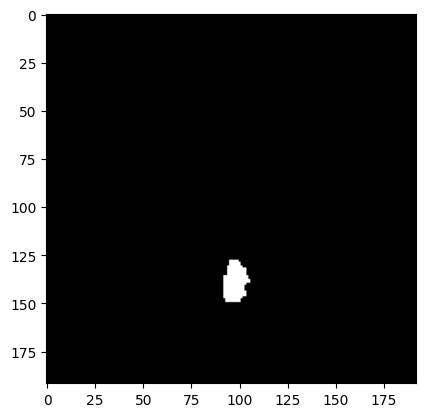

In [77]:
# np.unique(mask_tensor, return_counts=True)

slic = get_mid_slices(mask_tensor.cpu().detach().numpy().squeeze(0).squeeze(0))
plt.imshow(slic[1], cmap='gray')

In [60]:
val_labels_convert[0][0].shape, val_labels_convert[0][1].max(), val_labels_convert[0][0].min()

(torch.Size([192, 192, 192]),
 metatensor(1., device='cuda:0'),
 metatensor(0., device='cuda:0'))

In [56]:
val_labels_convert[0].shape, val_output_convert[0].shape

(torch.Size([3, 192, 192, 192]), torch.Size([1, 192, 192, 192]))

In [52]:
input_volume = ct_tensor.squeeze(0).squeeze(0).cpu().detach().numpy()
target_volume = mask_tensor.squeeze(0).squeeze(0).cpu().detach().numpy()
prediction_volume_1 = val_output_convert[0][0].cpu().detach().numpy()
prediction_volume_2 = val_output_convert[0][1].cpu().detach().numpy()
prediction_volume_3 = val_output_convert[0][2].cpu().detach().numpy()

# gt_volume_1 = val_labels_convert[0][0]


In [54]:
prediction_volume_2

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [95]:
li = []
for val in val_outputs_list:
    print(post_pred(val).shape, post_pred(val).max(), post_pred(val).min())
    print(val.shape, val.max(), val.min())
    print(post_pred(val)[1].shape, post_pred(val)[1].max(), post_pred(val)[1].min())
    li.append(post_pred(val))

torch.Size([3, 192, 192, 192]) metatensor(1., device='cuda:0') metatensor(0., device='cuda:0')
torch.Size([3, 192, 192, 192]) tensor(5.1693, device='cuda:0') tensor(-6.4717, device='cuda:0')
torch.Size([192, 192, 192]) metatensor(0., device='cuda:0') metatensor(0., device='cuda:0')


In [93]:
li[0][1].shape, li[0][1].max(), li[0][1].min()

(torch.Size([192, 192, 192]),
 metatensor(0., device='cuda:0'),
 metatensor(0., device='cuda:0'))

In [84]:
post_pred(decollate_batch(y_pred.as_tensor())[0])[1].shape, post_pred(decollate_batch(y_pred.as_tensor())[0])[1].max(), post_pred(decollate_batch(y_pred.as_tensor())[0])[1].min()

(torch.Size([192, 192, 192]),
 metatensor(1., device='cuda:0'),
 metatensor(0., device='cuda:0'))

In [80]:
decollate_batch(y_pred.as_tensor())[0][0].shape, decollate_batch(y_pred.as_tensor())[0][0].min(), decollate_batch(y_pred.as_tensor())[0][0].max()

(torch.Size([192, 192, 192]),
 tensor(-3.4869, device='cuda:0'),
 tensor(8.7854, device='cuda:0'))

In [75]:
y_pred.squeeze(0)[0].shape, y_pred.squeeze(0)[0].min(), y_pred.squeeze(0)[0].max()

(torch.Size([192, 192, 192]),
 metatensor(-3.4869, device='cuda:0'),
 metatensor(8.7854, device='cuda:0'))

In [71]:
y_pred.shape, y_pred.min(), y_pred.max()

(torch.Size([1, 3, 192, 192, 192]),
 metatensor(-14.2695, device='cuda:0'),
 metatensor(8.7854, device='cuda:0'))

In [65]:
val_output_convert[0].shape, val_output_convert[0].max(), val_output_convert[0].min()

(torch.Size([3, 192, 192, 192]),
 metatensor(1., device='cuda:0'),
 metatensor(0., device='cuda:0'))

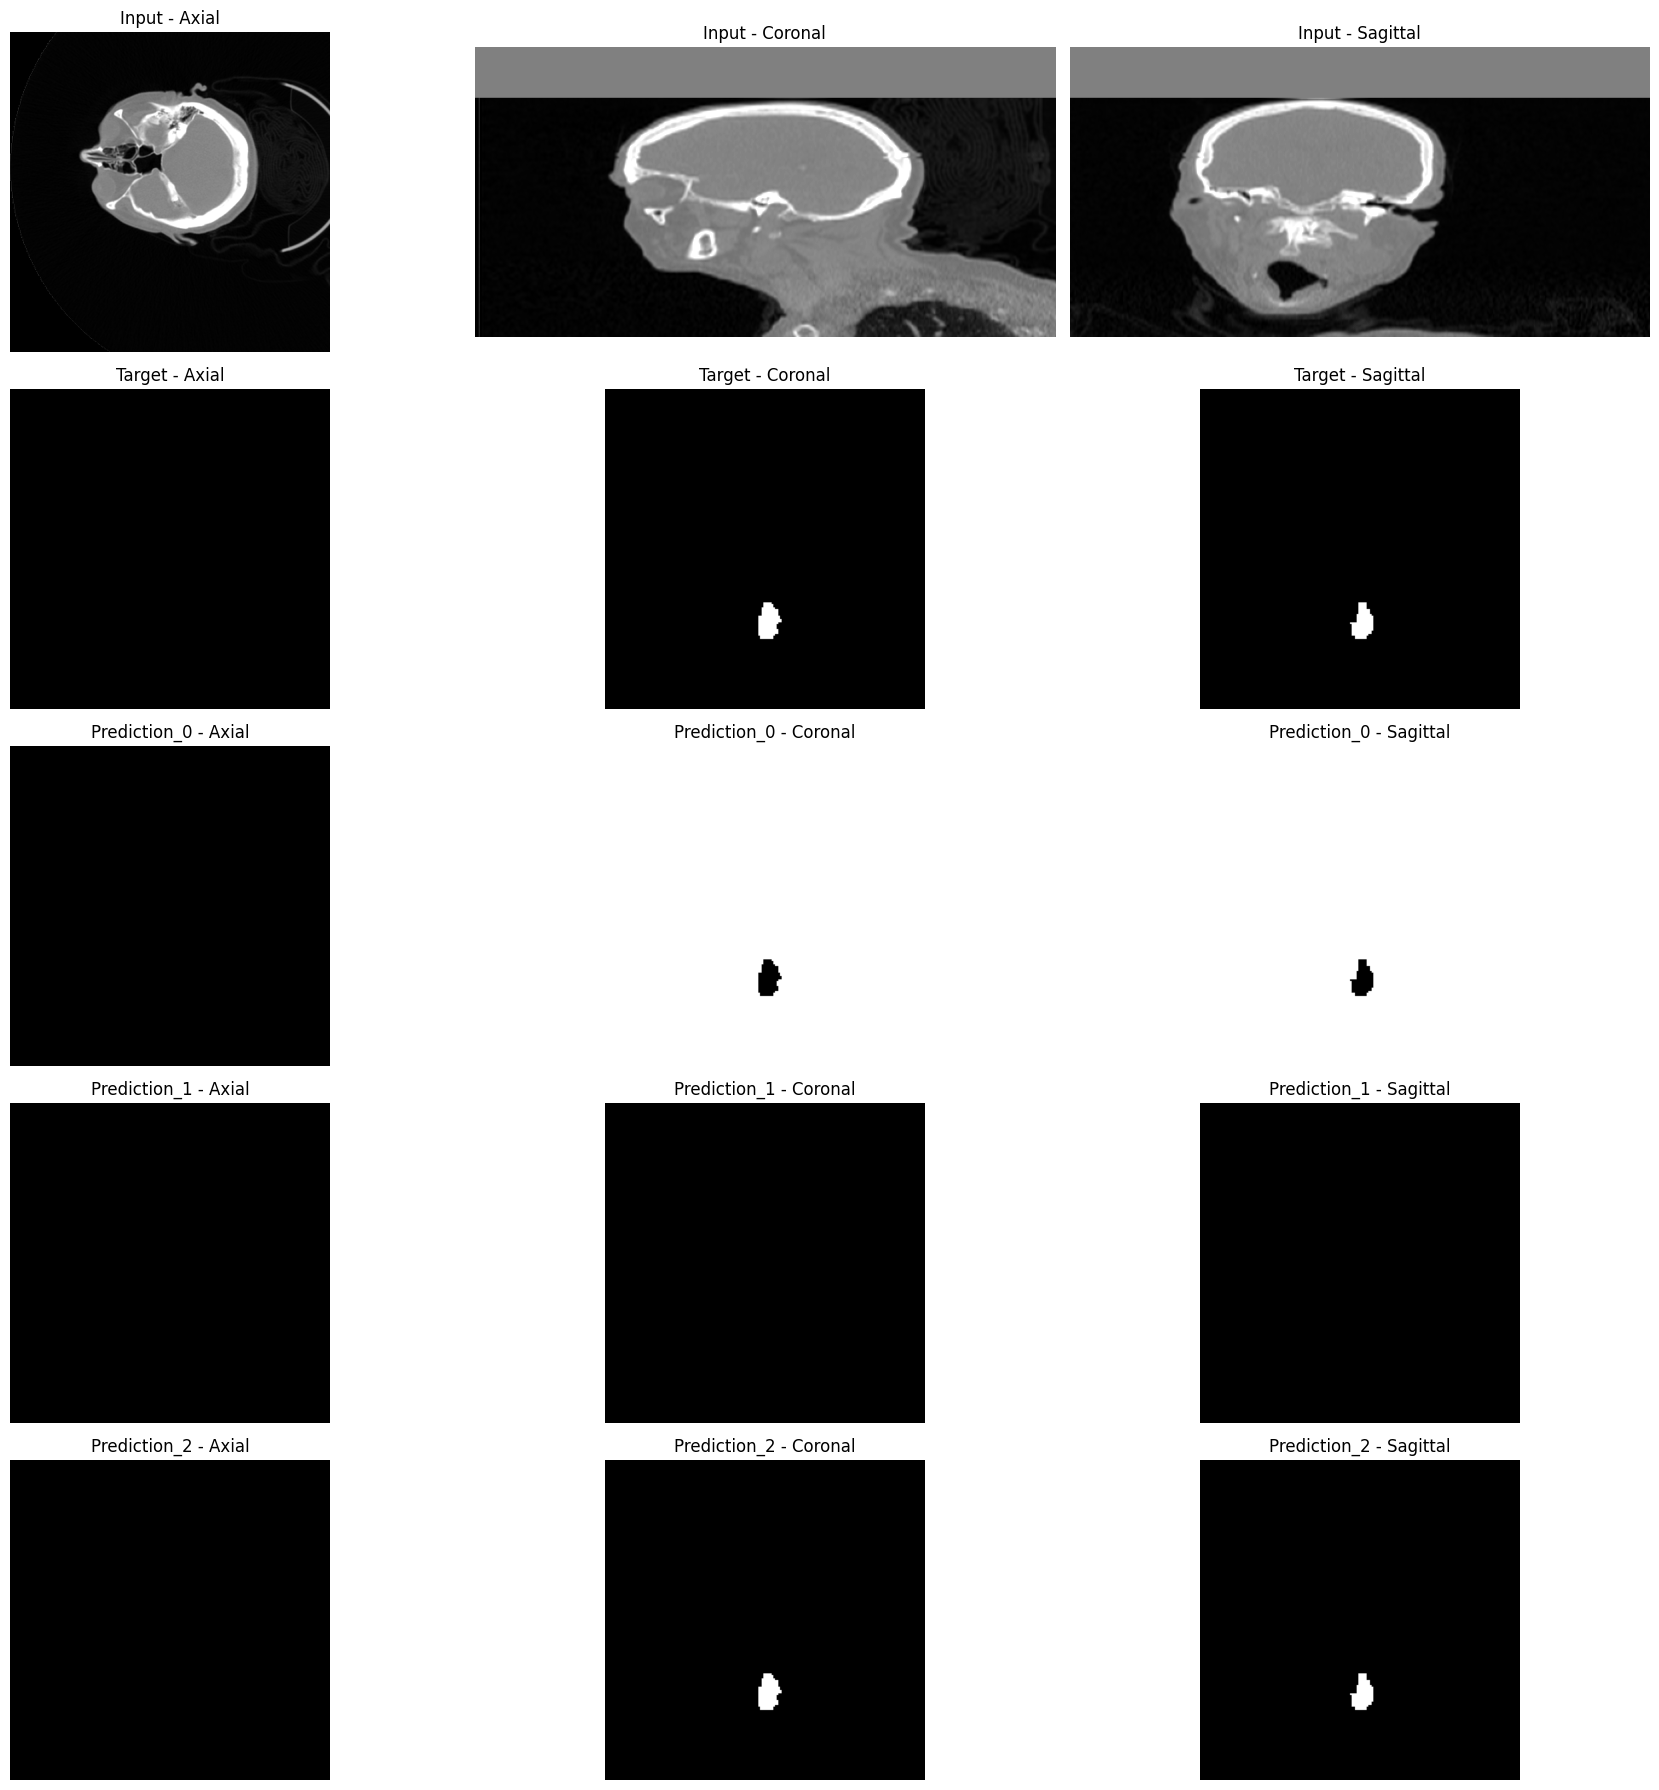

In [63]:
import numpy as np
import matplotlib.pyplot as plt


def get_mid_slices(volume):
    # Compute the mid-slices for each of the three dimensions.
    axial     = volume[volume.shape[0] // 2, :, :]
    coronal   = volume[:, volume.shape[1] // 2, :]
    sagittal  = volume[:, :, volume.shape[2] // 2]
    return axial, coronal, sagittal

# Get mid-slices for input, target, and prediction
input_slices      = get_mid_slices(input_volume)
target_slices     = get_mid_slices(target_volume)
# prediction_slices = get_mid_slices(prediction_volume)
prediction_slices_1 = get_mid_slices(prediction_volume_1)
prediction_slices_2 = get_mid_slices(prediction_volume_2)
prediction_slices_3 = get_mid_slices(prediction_volume_3)

# Create a 3x3 subplot: rows correspond to (Input, Target, Prediction)
# and columns correspond to (Axial, Coronal, Sagittal) views.
fig, axes = plt.subplots(5, 3, figsize=(18, 18))

# Define row and column titles for clarity
row_titles = ['Input', 'Target', 'Prediction_0', 'Prediction_1', 'Prediction_2']
col_titles = ['Axial', 'Coronal', 'Sagittal']

# Plot each slice in its respective subplot
for i, slices in enumerate([input_slices, target_slices, prediction_slices_1, prediction_slices_2, prediction_slices_3]):
    for j, slice_img in enumerate(slices):
        ax = axes[i, j]
        ax.imshow(slice_img, cmap='gray')
        ax.set_title(f"{row_titles[i]} - {col_titles[j]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

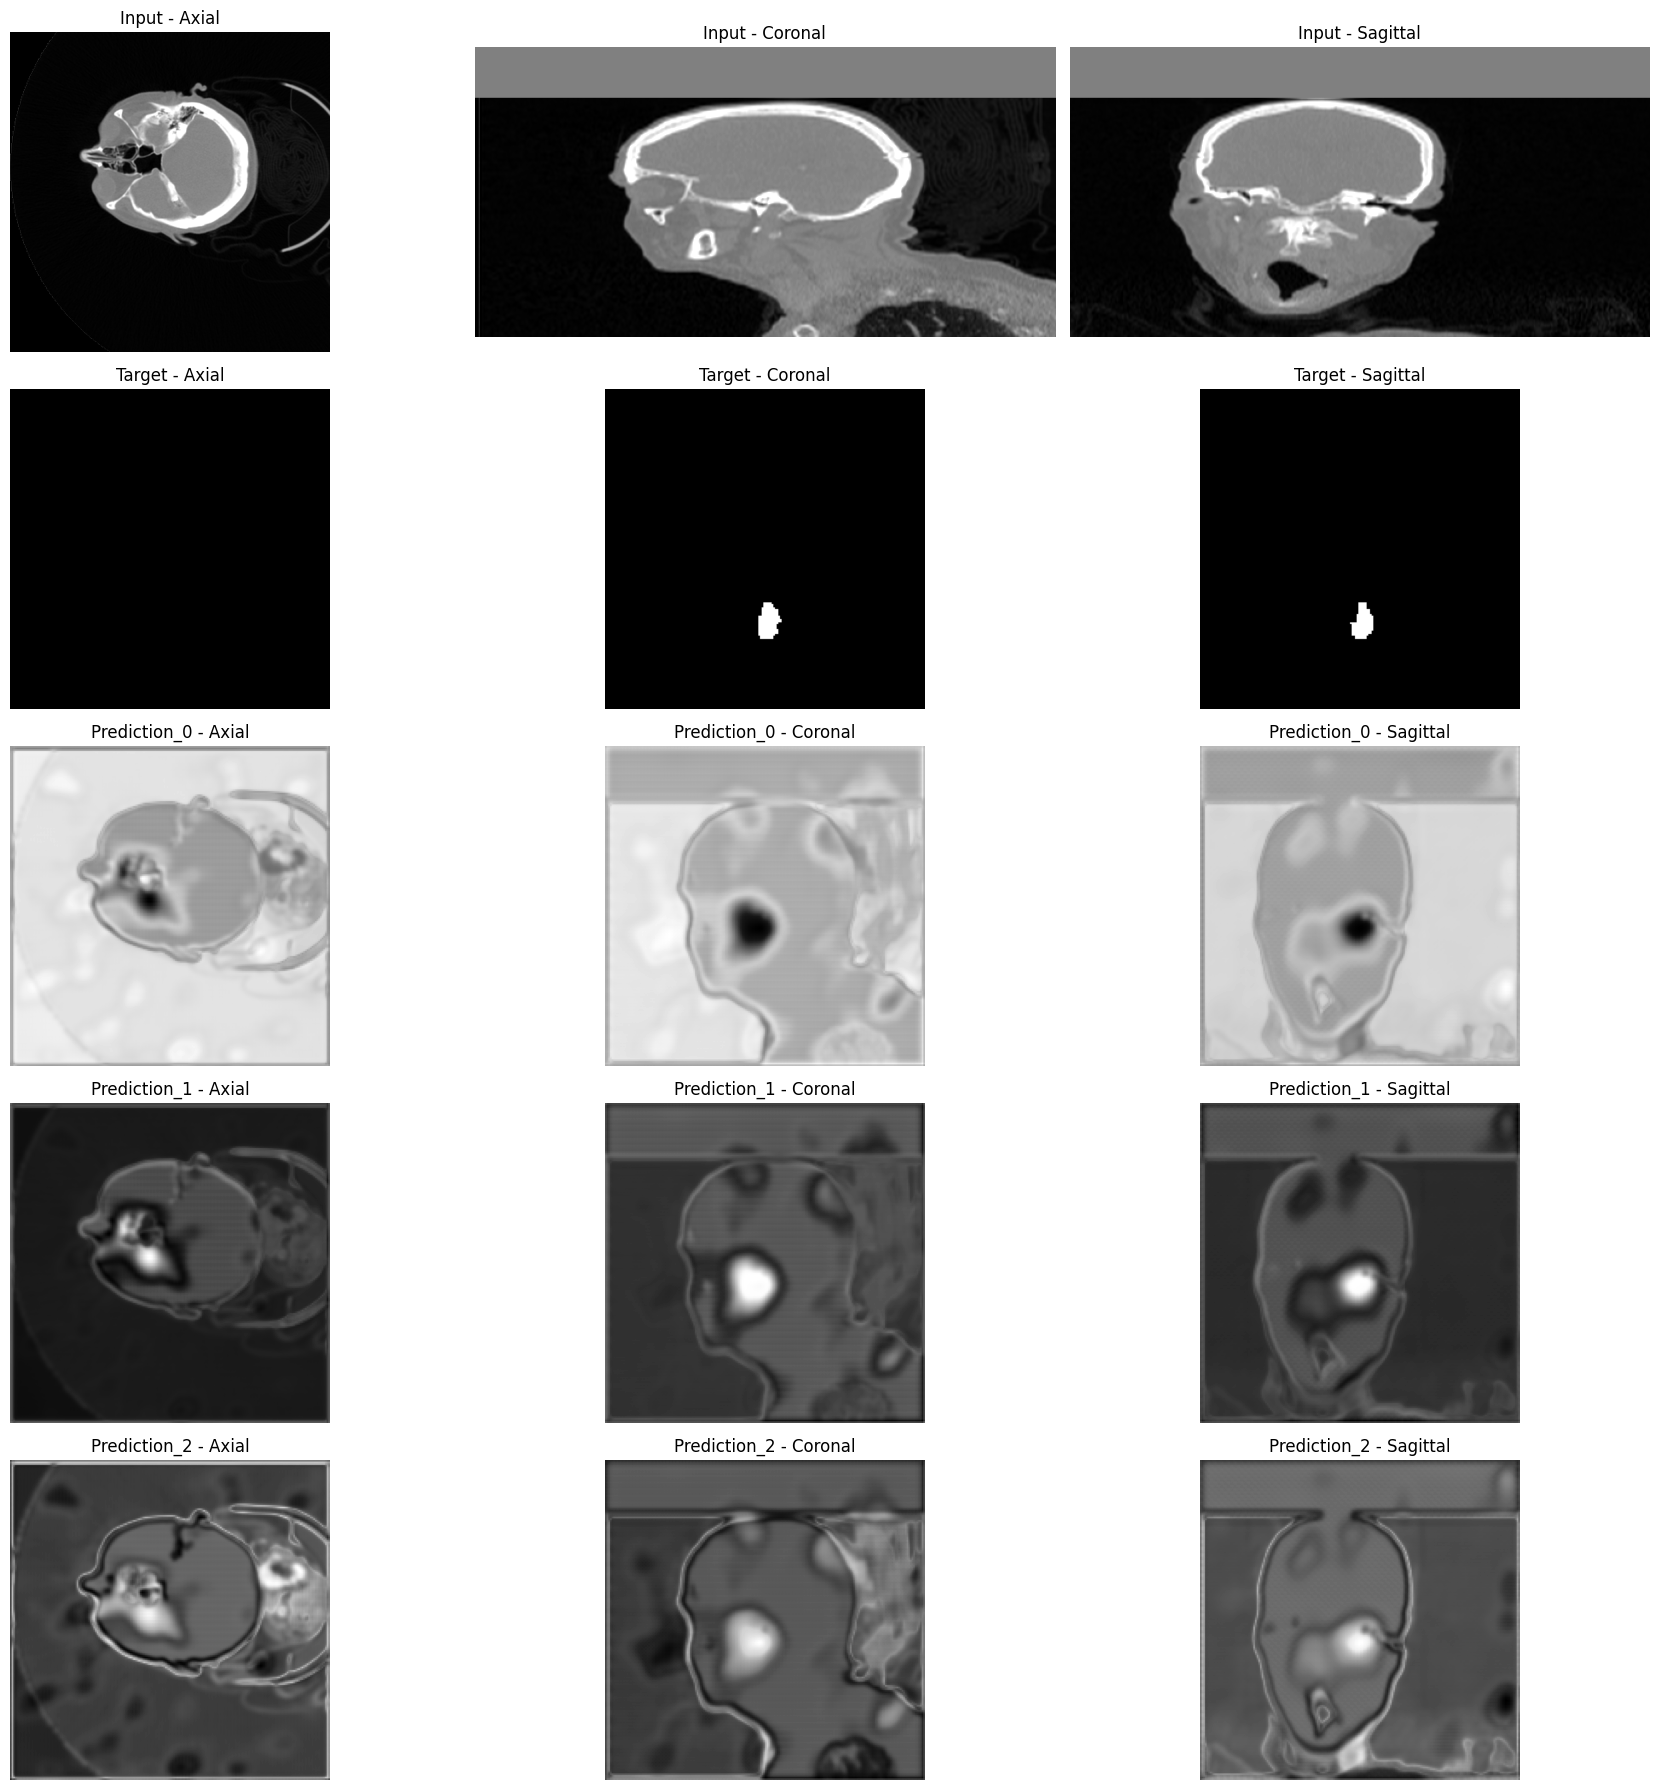

In [51]:
import numpy as np
import matplotlib.pyplot as plt


def get_mid_slices(volume):
    # Compute the mid-slices for each of the three dimensions.
    axial     = volume[volume.shape[0] // 2, :, :]
    coronal   = volume[:, volume.shape[1] // 2, :]
    sagittal  = volume[:, :, volume.shape[2] // 2]
    return axial, coronal, sagittal

# Get mid-slices for input, target, and prediction
input_slices      = get_mid_slices(input_volume)
target_slices     = get_mid_slices(target_volume)
# prediction_slices = get_mid_slices(prediction_volume)
prediction_slices_1 = get_mid_slices(prediction_volume_1)
prediction_slices_2 = get_mid_slices(prediction_volume_2)
prediction_slices_3 = get_mid_slices(prediction_volume_3)

# Create a 3x3 subplot: rows correspond to (Input, Target, Prediction)
# and columns correspond to (Axial, Coronal, Sagittal) views.
fig, axes = plt.subplots(5, 3, figsize=(18, 18))

# Define row and column titles for clarity
row_titles = ['Input', 'Target', 'Prediction_0', 'Prediction_1', 'Prediction_2']
col_titles = ['Axial', 'Coronal', 'Sagittal']

# Plot each slice in its respective subplot
for i, slices in enumerate([input_slices, target_slices, prediction_slices_1, prediction_slices_2, prediction_slices_3]):
    for j, slice_img in enumerate(slices):
        ax = axes[i, j]
        ax.imshow(slice_img, cmap='gray')
        ax.set_title(f"{row_titles[i]} - {col_titles[j]}")
        ax.axis('off')

plt.tight_layout()
plt.show()

In [80]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from segmentation_model_again import UNETR
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = UNETR()
model.to(device)

model.load_state_dict(torch.load("/share/sda/mohammadqazi/project/CTscan_prognosis_VLM-main/docs/weights_4/trail_16/0/best_model.pth"))

/tmp/ipykernel_3824954/1263215288.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/share/sda/mohammadqazi/project/CTscan_prognosis_VLM

<All keys matched successfully>

In [81]:
model.eval()

with torch.no_grad():
    for i, sample in enumerate(test_loader):
        hidden_state, ct_tensor, mask_tensor = sample['hidden_state'], sample['ct'], sample['seg']
        hidden_state = hidden_state.to(device)
        ct_tensor = ct_tensor.to(device)
        mask_tensor = mask_tensor.to(device)

        y_pred = model(ct_tensor, hidden_state)
        break

In [83]:
y_pred.shape, mask_tensor.shape

(torch.Size([1, 3, 192, 192, 192]), torch.Size([1, 1, 192, 192, 192]))

In [88]:
y_pred.shape, y_pred.min(), y_pred.max()

(torch.Size([1, 3, 192, 192, 192]),
 metatensor(-22.1603, device='cuda:0'),
 metatensor(16.2687, device='cuda:0'))

In [89]:
y_pred_softmax = F.softmax(y_pred, dim=1)

y_pred_softmax.shape, y_pred_softmax.min(), y_pred_softmax.max()

(torch.Size([1, 3, 192, 192, 192]),
 metatensor(2.1184e-17, device='cuda:0'),
 metatensor(1., device='cuda:0'))

In [97]:
len(slic)

3

In [120]:
slic[0].max()

np.float32(0.0)

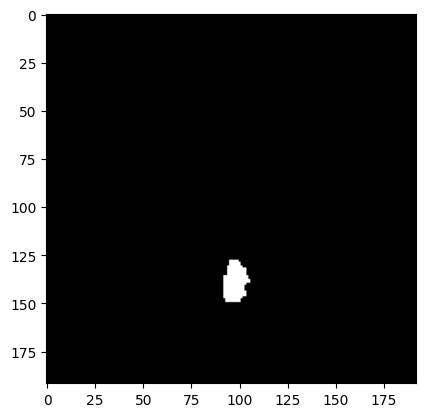

In [118]:
# plot the mid slide of the prediction and the softmax output

import numpy as np
import matplotlib.pyplot as plt

slic = get_mid_slices(mask_tensor.cpu().detach().numpy().squeeze(0).squeeze(0))
plt.imshow(slic[1], cmap='gray')

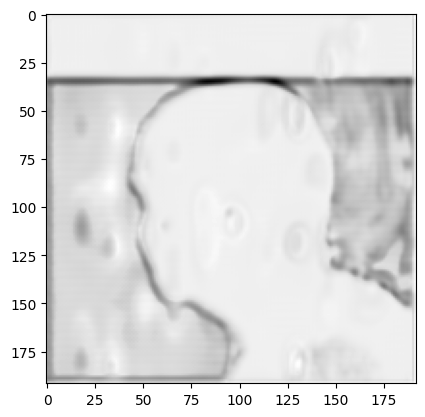

In [108]:
# plot the mid slide of the prediction and the softmax output

import numpy as np
import matplotlib.pyplot as plt

slic = get_mid_slices(y_pred.cpu().detach().numpy().squeeze(0)[2])
plt.imshow(slic[1], cmap='gray')

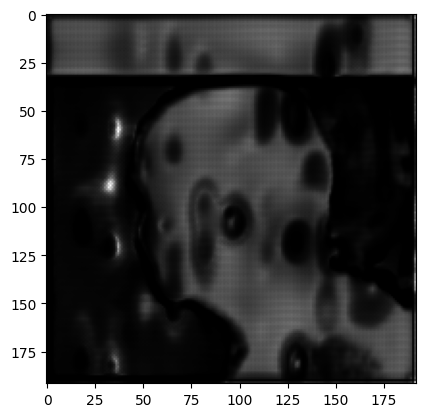

In [109]:
import numpy as np
import matplotlib.pyplot as plt

slic = get_mid_slices(y_pred_softmax.cpu().detach().numpy().squeeze(0)[2])
plt.imshow(slic[1], cmap='gray')